<a href="https://colab.research.google.com/github/Qind1609/ImgProcessing-Pytorch-CNN/blob/main/CNN_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
ROOT = "/content/drive"
drive.mount(ROOT)

import os
from os.path import join


PROJ = "MyDrive/T.A/b4/Animal"

PROJECT_PATH = join(ROOT,PROJ)

print(PROJECT_PATH)

In [ ]:
!nvidia-smi

#Convolutional Neural Networks


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from PIL import Image

## CNNNet-VGG16

In [ ]:
class VGGNet(nn.Module):

    def __init__(self, num_classes=5):
        super(VGGNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(4608, 4096),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Linear(4096, num_classes)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [ ]:
cnnnet = VGGNet()

In [ ]:
def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device="cpu"):
    for epoch in range(1, epochs+1):
        training_loss = 0.0
        valid_loss = 0.0
        model.train()
        for batch in train_loader:
            optimizer.zero_grad()
            inputs, targets = batch
            inputs = inputs.to(device)
            targets = targets.to(device)
            output = model(inputs)
            loss = loss_fn(output, targets)
            loss.backward()
            optimizer.step()
            training_loss += loss.data.item() * inputs.size(0)
        training_loss /= len(train_loader.dataset)
        
        model.eval()
        num_correct = 0 
        num_examples = 0
        for batch in val_loader:
            inputs, targets = batch
            inputs = inputs.to(device)
            output = model(inputs)
            targets = targets.to(device)
            loss = loss_fn(output,targets) 
            valid_loss += loss.data.item() * inputs.size(0)
            correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1],
                               targets)
            num_correct += torch.sum(correct).item()
            num_examples += correct.shape[0]
        valid_loss /= len(val_loader.dataset)

        print('Epoch: {}, Training Loss: {:.2f}, Validation Loss: {:.2f}, accuracy = {:.2f}'.format(epoch, training_loss,
        valid_loss, num_correct / num_examples))

In [ ]:
def check_image(path):
    try:
        im = Image.open(path)
        return True
    except:
        return False

img_transforms = transforms.Compose([
    transforms.Resize((100,100)),    
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
    ])
train_data_path = join(PROJECT_PATH,"train")
print()
train_data = torchvision.datasets.ImageFolder(root=train_data_path,transform=img_transforms)
train_cat = join(train_data_path,"cat")
train_dog = join(train_data_path,"dog")
train_lion = join(train_data_path,"lion")
train_horse = join(train_data_path,"horse")
train_elephant = join(train_data_path,"elephant")
print("Cat image: {} images".format(len(os.listdir(train_cat)))) #print number of images in folder val/cat
print("Dog image: {} images".format(len(os.listdir(train_dog)))) #print number of images in folder val/dog
print("Elephant image: {} images".format(len(os.listdir(train_elephant))))
print("Lion image: {} images".format(len(os.listdir(train_lion)))) 
print("Horse image: {} images".format(len(os.listdir(train_horse))))
val_data_path = join(PROJECT_PATH,"val")
val_cat = join(val_data_path,"cat")
val_dog = join(val_data_path,"dog")
val_lion = join(val_data_path,"lion")
val_horse = join(val_data_path,"horse")
val_elephant = join(val_data_path,"elephant")
print("Cat image: {} images".format(len(os.listdir(val_cat)))) #print number of images in folder val/cat
print("Dog image: {} images".format(len(os.listdir(val_dog)))) #print number of images in folder val/dog
print("Elephant image: {} images".format(len(os.listdir(val_elephant))))
print("Lion image: {} images".format(len(os.listdir(val_lion)))) 
print("Horse image: {} images".format(len(os.listdir(val_horse)))) 
val_data = torchvision.datasets.ImageFolder(root=val_data_path,transform=img_transforms)
batch_size=100
train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,shuffle=True)
val_data_loader  = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True)

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(device) 
else:
    device = torch.device("cuda")
cnnnet.to(device)
print(cnnnet)

In [ ]:
optimizer = optim.Adam(cnnnet.parameters(), lr=0.001)

In [ ]:
train(cnnnet, optimizer,torch.nn.CrossEntropyLoss(), train_data_loader,val_data_loader, epochs=100, device=device)

In [ ]:
labels = ['cat','dog','lion','horse','elephant']

img = Image.open(r"/content/drive/MyDrive/T.A/b4/Animal/test/0248HFV4VDZH.jpg")
display(img)
img = img_transforms(img).to(device)
img = torch.unsqueeze(img, 0)

cnnnet.eval() #evaluation mode
prediction = F.softmax(cnnnet(img), dim=1) #pass img through neural network, get output and then pass through softmax function...
print(prediction) #probability to be cat (idx 0) or fish (idx 1)
prediction = prediction.argmax() #return index of max value (max probability)
print(labels[prediction]) #print the class respect to the index of max value prediction 

In [ ]:

img = Image.open(r"/content/drive/MyDrive/T.A/b4/Animal/test/horses.jpg")
display(img)
img = img_transforms(img).to(device)
img = torch.unsqueeze(img, 0)

cnnnet.eval() #evaluation mode
prediction = F.softmax(cnnnet(img), dim=1) #pass img through neural network, get output and then pass through softmax function...
print(prediction) #probability to be cat (idx 0) or fish (idx 1)
prediction = prediction.argmax() #return index of max value (max probability)
print(labels[prediction]) #print the class respect to the index of max value prediction 

In [ ]:
torch.save(cnnnet, 'best-model.pt') 

## Downloading a pretrained network 

In [ ]:
import torchvision.models as models
vgg16 = models.vgg16(num_classes=5, pretrained=False)

In [ ]:
print(vgg16)

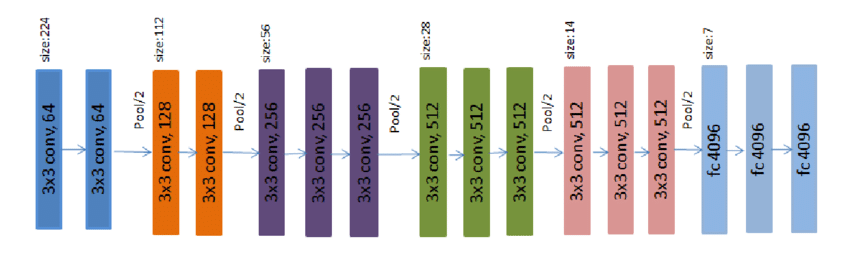